## Step 1: Install Required Library

In [36]:
pip install pytrends


In [40]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

# Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=330)

# Define your search terms
search_terms = ["Diljit Dosanjh"]

# Define countries to compare
countries = {
    'IN': 'India',
    'CA': 'Canada',
    'US': 'United States'
}


## Step 2: Set Up pytrends and Define Keywords & Countries

In [41]:
all_data = []

for kw in search_terms:
    for country_code, country_name in countries.items():
        pytrends.build_payload([kw], geo=country_code, timeframe='today 5-y')  # last 5 years
        df = pytrends.interest_over_time()
        if not df.empty:
            df = df[[kw]].rename(columns={kw: f"{kw} ({country_name})"})
            all_data.append(df)

# Merge all dataframes on the index (date)
from functools import reduce
merged_df = reduce(lambda left, right: left.join(right, how='outer'), all_data)
merged_df = merged_df.fillna(0)  # in case of missing data


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('fut

## Step 4: Plot the Results

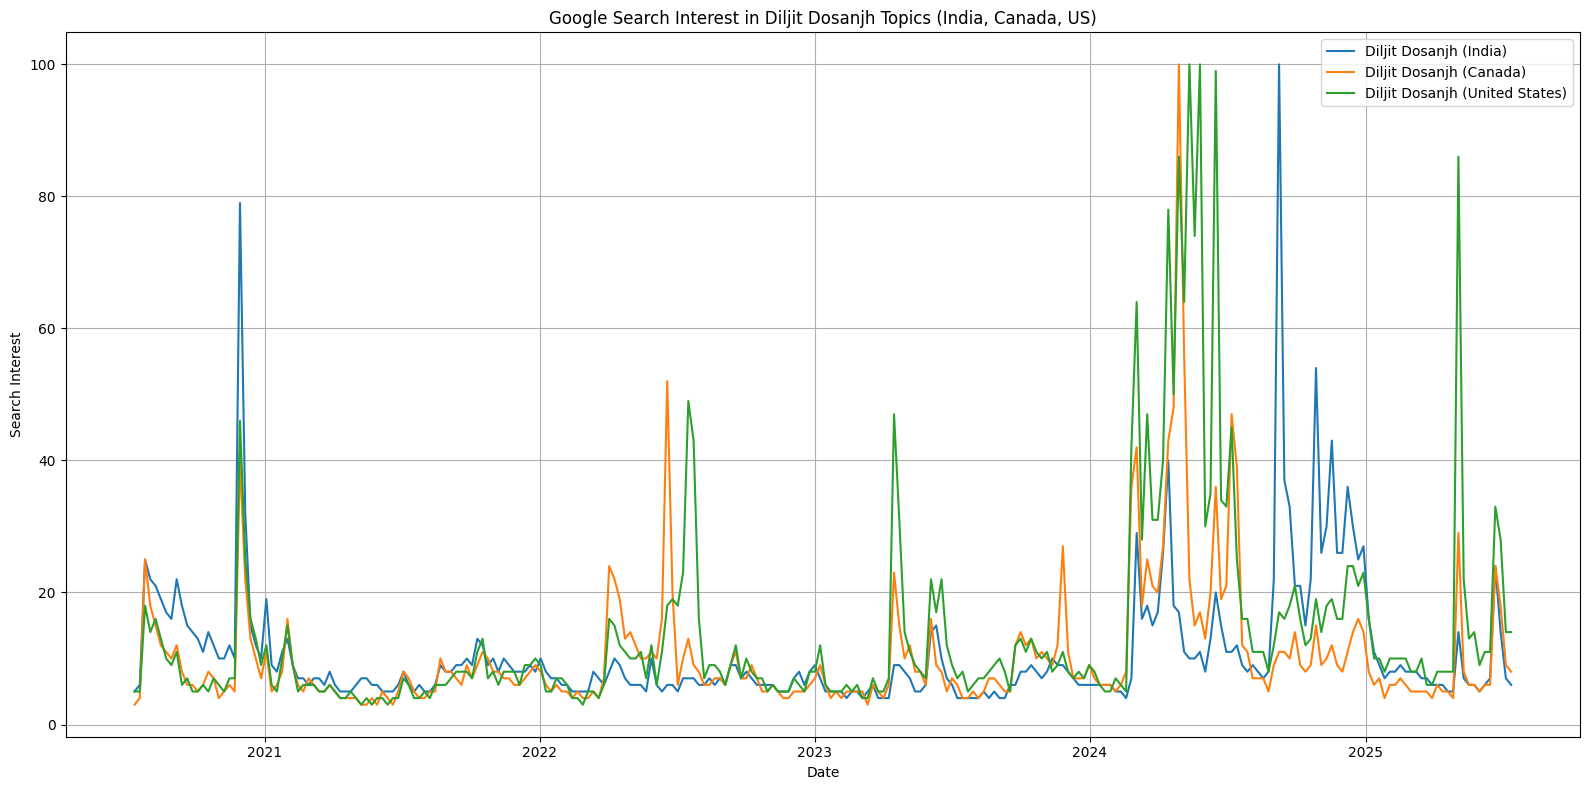

In [42]:
plt.figure(figsize=(16, 8))
for col in merged_df.columns:
    plt.plot(merged_df.index, merged_df[col], label=col)

plt.title("Google Search Interest in Diljit Dosanjh Topics (India, Canada, US)")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## New Libraries Installation

In [43]:
pip install requests pandas matplotlib


## Step 2: Fetch Pageview Data from Wikipedia API

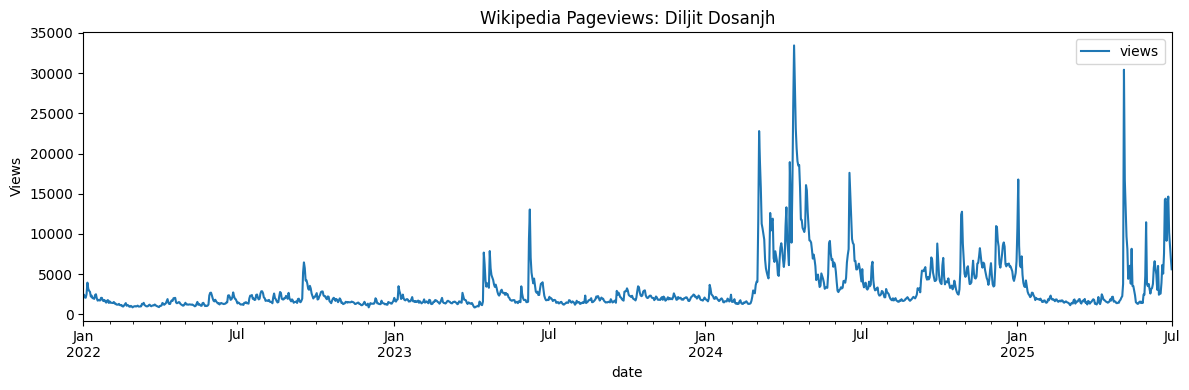

In [47]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Set headers
headers = {
    'User-Agent': 'DiljitAnalyticsProject/1.0 (anna.panna@example.com)'  # <-- Put your contact or project info here
}

# Setup
article = "Diljit_Dosanjh"
project = "en.wikipedia.org"
access = "all-access"
agent = "all-agents"
granularity = "daily"
start = "20220101"
end = "20250701"

# URL
url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/{project}/{access}/{agent}/{article}/{granularity}/{start}/{end}"

# Fetch with headers
response = requests.get(url, headers=headers)

# Check and parse
if response.status_code != 200:
    print("Error:", response.status_code, response.text)
    raise Exception("Failed to fetch data from Wikipedia API")

# Parse JSON
data = response.json()
views = pd.DataFrame([{
    "date": pd.to_datetime(item['timestamp'], format='%Y%m%d%H'),
    "views": item['views']
} for item in data['items']])

# Plot
views.set_index('date', inplace=True)
views.plot(figsize=(12, 4), title="Wikipedia Pageviews: Diljit Dosanjh", ylabel="Views")
plt.tight_layout()
plt.show()


## Set Up Code

In [107]:
import requests

def get_artist_mbid_strict(artist_name):
    url = "https://musicbrainz.org/ws/2/artist/"
    headers = {
        "User-Agent": "DiljitMusicProject/1.0 ( your_email@example.com )"
    }
    params = {
        'query': f'artist:"{artist_name}"',
        'fmt': 'json',
        'limit': 5
    }
    response = requests.get(url, params=params, headers=headers)
    if response.status_code == 200:
        data = response.json()
        for artist in data['artists']:
            if artist['name'].lower() == artist_name.lower():
                return artist['id']
            print(f"Candidate: {artist['name']} - {artist['id']}")
    return None

artist_name = "Diljit Dosanjh"
mbid = get_artist_mbid_strict(artist_name)
print(f"Artist MBID for {artist_name}: {mbid}")



Artist MBID for Diljit Dosanjh: f931c961-b647-4861-be8c-f47d84a4de51


## Step 2: Get All Songs by Artist MBID

In [110]:
import requests
import time
import pandas as pd

def get_recordings_by_artist(mbid, limit=100, max_pages=10):  # Increase max_pages if needed
    base_url = "https://musicbrainz.org/ws/2/recording"
    headers = {
        "User-Agent": "DiljitProject/1.0 (your_email@example.com)"
    }
    recordings = []
    offset = 0

    for page in range(max_pages):
        params = {
            'artist': mbid,
            'limit': limit,
            'offset': offset,
            'fmt': 'json'
        }

        response = requests.get(base_url, headers=headers, params=params)
        if response.status_code != 200:
            print(f"Failed at page {page+1}: {response.status_code}")
            break

        data = response.json()
        page_recordings = data.get('recordings', [])
        recordings.extend(page_recordings)

        print(f"Fetched {len(page_recordings)} recordings from page {page+1}")
        if len(page_recordings) < limit:
            break  # End of available recordings

        offset += limit
        time.sleep(1)  # Be nice to MusicBrainz

    return recordings

# Step 1: Get recordings
mbid = "f931c961-b647-4861-be8c-f47d84a4de51"
diljit_recordings = get_recordings_by_artist(mbid)

# Step 2: Extract title and MBID
recording_data = [{"title": rec['title'], "id": rec['id']} for rec in diljit_recordings]

# Step 3: Save to CSV
df = pd.DataFrame(recording_data)
df.to_csv("diljit_recordings.csv", index=False)

print(f"✅ Saved {len(df)} recordings to diljit_recordings.csv")


Fetched 100 recordings from page 1
Fetched 100 recordings from page 2
Fetched 100 recordings from page 3
Fetched 86 recordings from page 4
✅ Saved 386 recordings to diljit_recordings.csv


In [112]:
import pandas as pd
import requests
import time
import json

# Step 1: Load your CSV
df = pd.read_csv("diljit_recordings.csv")

# Step 2: Store results
results = []

# Step 3: Loop through each MBID and fetch AcousticBrainz data
for index, row in df.iterrows():
    mbid = row['id']
    title = row['title']

    url = f"https://acousticbrainz.org/{mbid}/low-level"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        features = {
            'mbid': mbid,
            'title': title,
            'tempo': data.get('rhythm', {}).get('bpm'),
            'danceability': data.get('rhythm', {}).get('danceability'),
            'key': data.get('tonal', {}).get('key_key'),
            'scale': data.get('tonal', {}).get('key_scale'),
            #'gender': data.get('lowlevel', {}).get('average_loudness'),
        }
        results.append(features)
        print(f"✅ Got features for: {title}")
    else:
        print(f"❌ No data for: {title} — {mbid}")

    time.sleep(0.5)  # Be polite

# Step 4: Save to CSV
features_df = pd.DataFrame(results)
features_df.to_csv("diljit_audio_features.csv", index=False)

print(f"\n🎉 Done! Saved {len(features_df)} tracks with features to 'diljit_audio_features.csv'")


❌ No data for: Dilan Diyan Khotian — 050342e1-b96e-47dc-be1c-58af69685794
❌ No data for: Alrhan Kuarian — 05721269-ff24-4358-a9d1-88125c5098fc
✅ Got features for: Drive
❌ No data for: Enlightenment — 089f9444-aa1d-4344-aa04-1be4b0b6d9e8
❌ No data for: Dil Sadde Naal La Lai — 094aac96-88a4-4ab5-bae4-a4aa309df94d
❌ No data for: Dum Dum (Reprise) — 0b69088f-757c-4f7d-b0cb-b065ec782a62
❌ No data for: Boliyaan — 11d6873e-2fb9-46a3-ba83-70aee531cced
❌ No data for: Do U Know — 176b7328-56f1-4eaa-b9a9-dbcf60fb7342
❌ No data for: Bahana — 17f5260e-c776-4722-9214-ea565673732c
❌ No data for: Baby Girl — 19530a69-8fa4-4980-a559-28aa1ec3c496
❌ No data for: Dheen — 1adad52d-43ca-4187-b12b-aaba3a6c6365
❌ No data for: Don — 1c0f68ef-226f-418c-afbe-eb60c5067c80
❌ No data for: Chunni — 1e92d43f-2d0b-4767-b1c7-4d325a849a2b
❌ No data for: Baaz Te Ghoda — 1fa0f6ba-17cd-42df-a311-631add267108
❌ No data for: Challa — 20bba410-0f50-4c74-94b5-a56ae5151f7b
❌ No data for: Chano — 2ac7191f-1661-4bd1-9b13-49371472

#  Load, Clean, Visualize, and Cluster

                                   mbid        title       tempo  \
0  07166f85-b336-442a-a326-4b85d36c3db8        Drive   87.933029   
1  a1d68a04-b2e6-4607-8978-673d36ff4b34  Beedio Call  172.265274   
2  b0415cdb-3c3c-4445-b4cd-126a33a3edc4    Big Scene  150.395828   
3  b4a0bc86-c681-465c-b5b0-1c069272416f       Future   90.054184   
4  f638cbed-f3a4-449d-8b43-ff105b118060     High End  163.906281   

   danceability key  scale  
0      1.406853  A#  minor  
1      1.411120  D#  minor  
2      1.034794  G#  minor  
3      1.198532   F  minor  
4      1.283974   F  major  
Index(['mbid', 'title', 'tempo', 'danceability', 'key', 'scale'], dtype='object')


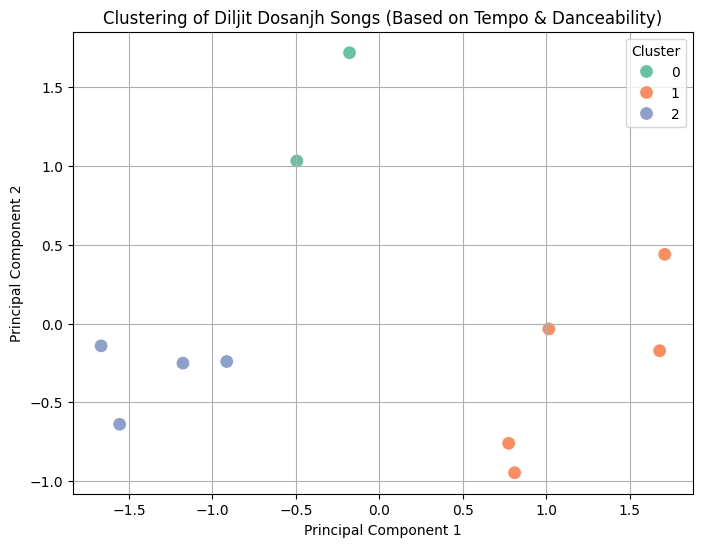

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Load the data
df = pd.read_csv('diljit_audio_features.csv')

# 2. Quick overview
print(df.head())
print(df.columns)

# 3. Select relevant numeric features only
# We drop 'scale', 'key', 'gender' since they are categorical
selected_features = ['tempo', 'danceability']
df_clean = df[selected_features].dropna()

# 4. Scale the features
scaler = StandardScaler()
scaled = scaler.fit_transform(df_clean)

# 5. PCA (Optional since only 2 features, but we'll still do it)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# 6. KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(pca_data)

# 7. Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title("Clustering of Diljit Dosanjh Songs (Based on Tempo & Danceability)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


# **Discography Impact Timeline**

In [121]:
import pandas as pd
import plotly.express as px

# Sample data
data = [
    {"title": "Born to Shine", "date": "2020-07-05", "type": "Single", "note": "Charted in Canada"},
    {"title": "Clash ft. Tory Lanez", "date": "2021-06-20", "type": "Collaboration", "note": "Indo-Western collab"},
    {"title": "Lover", "date": "2021-08-22", "type": "Album", "note": "Won Filmfare Best Album"},
    {"title": "Lemonade", "date": "2022-02-14", "type": "Single", "note": "1M views in 24h"},
    {"title": "Ghost", "date": "2022-10-01", "type": "Album", "note": "Top 10 Apple India"},
    {"title": "Hass Hass ft. Sia", "date": "2023-11-17", "type": "Collaboration", "note": "Global Spotify debut"},
    {"title": "Case", "date": "2023-10-24", "type": "Single", "note": "Billboard Canadian Hot 100"},
    {"title": "Khutti", "date": "2024-03-29", "type": "Collaboration", "note": "NZ Hot Singles Chart"},
]

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Corrected plot
fig = px.scatter(df, x='date', y='type', text='title', color='type',
                 hover_data=['note'], size_max=60)

fig.update_traces(textposition='top center')
fig.update_layout(
    title="Diljit Dosanjh Discography Timeline (Impact Highlights)",
    xaxis_title="Date",
    yaxis_title="",
    showlegend=True,
    height=500
)

fig.show()
